# Inaugural Project

Imports and set magics:

In [11]:
#Import required packages
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

*We illustrate how the relationship between $H_F$ and $H_M$ changes when $\alpha$ and $\sigma$ take on different values*

The matrix v is shown below:
[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]
the alpha values are represented in the rows and sigma values are in the columns


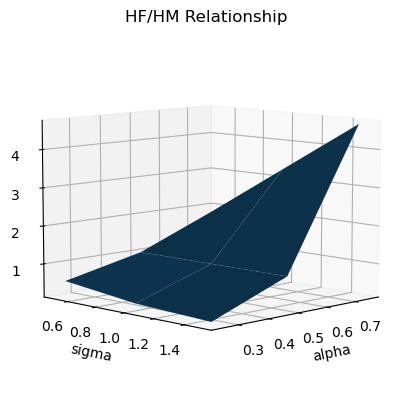

In [12]:
#We define an $\alpha$ and $\sigma$ vector, so they can have different values
alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1.0,1.5]
v = np.zeros([3,3])

#We create a loop where we calulate the relationship between $H_F$ and $H_M$, when $\alpha$ and $\sigma$ are the different values in their respective vector.
for it, alpha in enumerate(alpha_vec): #We use enumerate to get the index of the vector
    model.par.alpha = alpha
    for jt, sigma in enumerate(sigma_vec): #We use enumerate to get the index of the vector
        model.par.sigma = sigma
        out = model.solve_discrete()
        #We put all the relationships between $H_F$ and $H_M$ into a 3x3 matrix called v
        v[it,jt] = out.HF/out.HM
print('The matrix v is shown below:')
print(v)
print('the alpha values are represented in the rows and sigma values are in the columns')

# Here we set up the code to plot the figure
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
alpha_meshgrid, sigma_meshgrid = np.meshgrid(alpha_vec,sigma_vec, indexing='ij')
ax.plot_surface(alpha_meshgrid, sigma_meshgrid, v)

#We invert the x-axis and set up view angle
ax.invert_xaxis()
ax.view_init(elev=8, azim=45)

#Set labels to the figure
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM')
ax.set_title("HF/HM Relationship")
plt.show()

In [3]:
#v is the 3x3 vector of the HF/HM relationship with the different values of alpha and sigma
#Alpha values change through the rows and the sigma values change through the columns
print(v)

[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


In the first row $\alpha=0.25$, and $\sigma=0.5$ in the first column, $\sigma=1.0$ in the second column, and $\sigma=1.5$ in the third column.
In the second row $\alpha=0.50$, and $\alpha=0.75$ in the third row

We see that the relationship is equal to 1 no matter the value of $\sigma$, when $\alpha$ = 0.5. \
The relationship between $H_F$ and $H_M$ is maximized, when both $\sigma$ and $\alpha$ are their highest value. The relationship between $H_F$ and $H_M$ is minimized, when $\alpha$ is it's lowest value given that $\sigma$ is at its highest value.

# Question 2

We run the model and plot the solution.

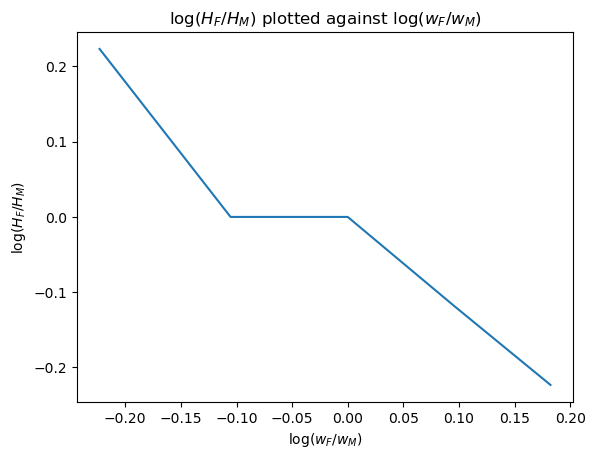

In [4]:
#We reset the parameters
model.par.alpha = 0.5
model.par.sigma = 1

#We run the model for solving the wF vector in discrete time
model.solve_wF_vec(discrete=True)

#From there we create the log of the HF/HM relationship
log_forhold_HF_HM = np.log(model.sol.HF_vec/model.sol.HM_vec)

#Next we create the log of the relationship between the wages, WF and WM
log_forhold_WF_WM = np.log(model.par.wF_vec/model.par.wM)

#Plot the relationships
plt.plot(log_forhold_WF_WM, log_forhold_HF_HM)
plt.title("log($H_F$/$H_M$) plotted against log($w_F$/$w_M$)")
plt.xlabel("log($w_F$/$w_M$)")
plt.ylabel("log($H_F$/$H_M$)")
plt.show()

In the plot above it can be seen that there is no linear relationship between $\log(H_F/H_M)$ and $\log(w_F/w_M)$. 

The figure shows a negative relationship between $\log(H_F/H_M)$ and $\log(w_F/w_M)$, meaning as $\log(w_F/w_M)$ increases, $\log(H_F/H_M)$ decreases. \
When female labor wages increase, the return on female labor increases relative to male labor. This means that it is optimal for the household to let female workers substitute towards more hours working in the labor market and for male workers to provide more hours working in the house as return on female labor work increases.


# Question 3

Here we run the solution for a continuous model, where we assume that working hours can take any value between 0 and 24. 

c:\Users\adamk\OneDrive\Skrivebord\UNI\6. Semester\Intro Programming\projects-2023-joost-adam-og-frederik\inauguralproject\HouseholdSpecializationModel.py:65: RuntimeWarning: invalid value encountered in double_scalars
  (1-par.alpha)*HM**((par.sigma - 1)/par.sigma) \


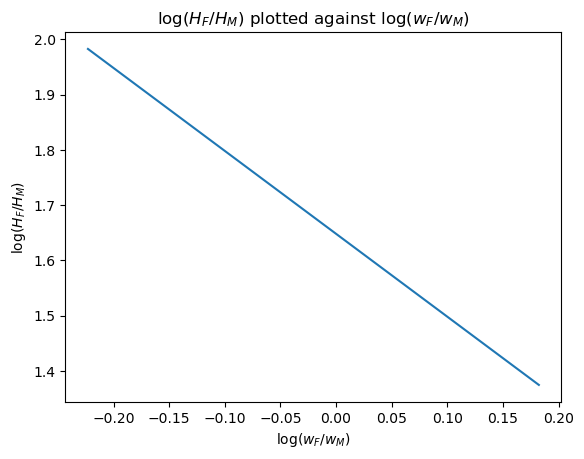

In [13]:
#Run the model for solving the wF vector in continuous time
model.solve_wF_vec(discrete=False)

#Create Log HF/HM relationship
log_forhold_HF_HM = np.log(model.sol.HF_vec/model.sol.HM_vec)

#Next we create the log of the relationship between the wages, WF and WM
log_forhold_WF_WM = np.log(model.par.wF_vec/model.par.wM)

#Plot the relationships
plt.plot(log_forhold_WF_WM, log_forhold_HF_HM)
plt.title("log($H_F$/$H_M$) plotted against log($w_F$/$w_M$)")
plt.xlabel("log($w_F$/$w_M$)")
plt.ylabel("log($H_F$/$H_M$)")
plt.show()

Here we note that there is a linear relationship between $\log(H_F/H_M)$ and $\log(w_F/w_M)$. 

Just as in Question 2, the intuition is that when return on the wage on female labor work increases relative to male labor work, then working hours at home will increase for males compared to females. \
When the return on male labor work increases relative to female labor work, then working hours at home will increase for females compared to males. \
In the case where the wage rate is similar between female and male, then working hours will similar as well. 

# Question 4

We find the values of $\alpha$ and $\sigma$ that minimize $(\beta_0-\v\beta_0)^2+(\beta_1-\v\beta_1)^2$.

In [6]:
#We run the model to question 4, where we let intital values of $\sigma$ and $\alpha$ be 0.5 and 1.
q4 = model.estimate(alpha=0.5, sigma=1.0)
q4_alpha = model.par.alpha
q4_sigma = model.par.sigma

#We define the squared error and print values for alpha, sigma, beta0, beta1 and the squared error.
error = (model.sol.beta0 - model.par.beta0_target)**2 + (model.sol.beta1 - model.par.beta1_target)**2
print(f'The squared difference is minimized, when alpha is {model.par.alpha:.3f} and sigma is {model.par.sigma:.3f}.')
print(f'At these values our beta0 and beta1 coefficients are {model.sol.beta0:.3f} and {model.sol.beta1:.3f}.') 
print(f'With those beta coefficients the squared difference is {error:.3f}.')

The squared difference is minimized, when alpha is 0.982 and sigma is 0.100.
At these values our beta0 and beta1 coefficients are 0.400 and -0.100.
With those beta coefficients the squared difference is 0.000.


As seen $\alpha$ is 0.982, which implies that the results from Siminski and Yetsenga (2022) indicate that females are more productive in home production than males. \
Furthermore $\sigma$ is 0.100, which implies a small degree of substitution between female and male home production. 


# Question 5

First we run the baseline model without optimizing for $\epsilon_M$ and $\epsilon_F$.

In [7]:
#We reset the alpha and sigma values
model.par.alpha=0.5
model.par.sigma=1.0

#We run the model
model.estimate_q5(sigma=1.0,epsilon_M=1.0,epsilon_F=1.0, extend=False)

#We define the squared error and print values for alpha, sigma, beta0, beta1 and the squared error.
error1 = (model.sol.beta0 - model.par.beta0_target)**2 + (model.sol.beta1 - model.par.beta1_target)**2
print(f'The squared difference is minimized, when alpha is {model.par.alpha:.3f} and sigma is {model.par.sigma:.3f}.')
print(f'At these values our beta0 and beta1 coefficients are {model.sol.beta0:.3f} and {model.sol.beta1:.3f}.') 
print(f'With those beta coefficients the squared difference is {error1:.3f}.')

The squared difference is minimized, when alpha is 0.500 and sigma is 0.010.
At these values our beta0 and beta1 coefficients are -0.000 and -0.010.
With those beta coefficients the squared difference is 0.168.


Now, we run the extended model. \
Here we optimize for $\epsilon_M$ and $\epsilon_F$:

In [8]:
#Again we reset the parameter values
model.par.alpha=0.5
model.par.sigma=1.0
model.par.epsilon_F = 1.0
model.par.epsilon_M = 1.0

#We run the extended model
model.estimate_q5(sigma=1.0,epsilon_M=1.0,epsilon_F=1.0, extend=True)

#We define the squared error and print values for alpha, sigma, beta0, beta1 and the squared error.
error2 = (model.sol.beta0 - model.par.beta0_target)**2 + (model.sol.beta1 - model.par.beta1_target)**2
print(f'The squared difference is minimized, when alpha is {model.par.alpha:.3f} and sigma is {model.par.sigma:.3f}.')
print(f'At these values our beta0 and beta1 coefficients are {model.sol.beta0:.3f} and {model.sol.beta1:.3f}.') 
print((f'Furthermore epsilon_M is {model.par.epsilon_M:.3f} and epsilon_F is {model.par.epsilon_F:.3f}.'))
print(f'With those beta coefficients the squared difference is {error2:.3f}.')

The squared difference is minimized, when alpha is 0.500 and sigma is 0.100.
At these values our beta0 and beta1 coefficients are 0.000 and -0.100.
Furthermore epsilon_M is 1.021 and epsilon_F is 1.292.
With those beta coefficients the squared difference is 0.160.


From this, we can conclude that our extension of the model produces a slightly lower squared difference, when $\alpha$ is equal to 0.5. \
This means that our extended model is a slightly better fit than the baseline model.